# Homework Assignment #3

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 

In [2]:
yelp_test = pd.read_csv("yelp142_test.csv")
yelp_train = pd.read_csv("yelp142_train.csv")
yelp_train.info()
yelp_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       6272 non-null   float64
 1   review_count                6272 non-null   int64  
 2   GoodForKids                 6272 non-null   object 
 3   Alcohol                     6272 non-null   object 
 4   BusinessAcceptsCreditCards  6272 non-null   object 
 5   WiFi                        6272 non-null   object 
 6   BikeParking                 6272 non-null   object 
 7   ByAppointmentOnly           6272 non-null   object 
 8   WheelechairAccessible       6272 non-null   object 
 9   OutdoorSeating              6272 non-null   object 
 10  RestaurantsReservations     6272 non-null   object 
 11  DogsAllowed                 6272 non-null   object 
 12  Caters                      6272 non-null   object 
dtypes: float64(1), int64(1), object(1

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,3.0,53,TRUE,(Missing),TRUE,'free',TRUE,(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)
1,5.0,6,(Missing),(Missing),TRUE,(Missing),(Missing),FALSE,(Missing),(Missing),(Missing),(Missing),(Missing)
2,2.5,7,(Missing),(Missing),TRUE,(Missing),FALSE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)
3,3.5,73,TRUE,'none',TRUE,'no',TRUE,(Missing),TRUE,FALSE,FALSE,(Missing),TRUE
4,4.0,203,TRUE,'beer_and_wine',TRUE,'free',TRUE,(Missing),TRUE,TRUE,FALSE,(Missing),TRUE


# a)

This modeling approach doesn't seem very reasonable however it might be. There are some upsides to it since it does note the businesses that do not have all the data. This could potentially help businesses make decisions when reviewing overall data. 

# b)

i)

In [3]:
model = smf.ols(formula = "stars ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + C(Alcohol, Treatment(reference='(Missing)')) + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) + C(WiFi, Treatment(reference='(Missing)')) + C(BikeParking, Treatment(reference='(Missing)')) + C(ByAppointmentOnly, Treatment(reference='(Missing)')) + C(WheelechairAccessible, Treatment(reference='(Missing)')) + C(OutdoorSeating, Treatment(reference='(Missing)')) + C(RestaurantsReservations, Treatment(reference='(Missing)')) + C(DogsAllowed, Treatment(reference='(Missing)')) + C(Caters, Treatment(reference='(Missing)'))", data = yelp_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     52.86
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          1.16e-237
Time:                        23:24:02   Log-Likelihood:                -7281.7
No. Observations:                6272   AIC:                         1.462e+04
Df Residuals:                    6246   BIC:                         1.479e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

ii)

In [4]:
yelp_train1 = pd.get_dummies(yelp_train)
#yelp_train2 =  pd.get_dummies(yelp_train, drop_first=True)

In [5]:
y = yelp_train1['stars']
X = yelp_train1.drop(['stars'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,  
                                                    stratify=yelp_train['stars'],
                                                    random_state=88,)
X_train.shape, X_test.shape

((4390, 36), (1882, 36))

Node count = 5


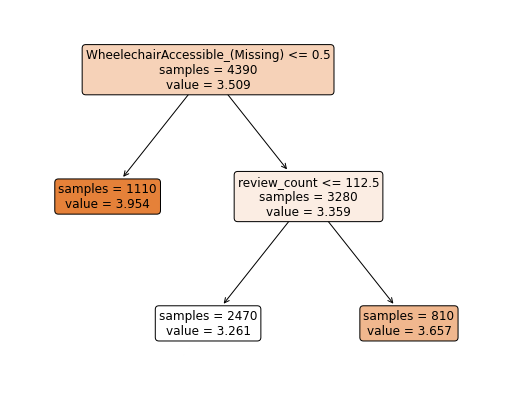

In [6]:
grid_values = {'ccp_alpha': np.linspace(0, 0.001, 6272),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]}
           
dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [7]:
grid_values = {'ccp_alpha':np.linspace(0, 0.1, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'random_state': [88]}

dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv=10, verbose=1)
dtr_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(ccp_alpha=0.02,
                                             min_samples_split=10,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.016...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'min_samples_leaf': [5], 'min_samples_split': 

In [8]:
acc = dtr_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtr_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

,ccp alpha,Validation Accuracy
0,0.0,0.063317
1,0.0005,0.119061
2,0.001,0.151582
3,0.0015,0.159115
4,0.002,0.153668
5,0.0025,0.145905
6,0.003,0.150336
7,0.0035,0.151115
8,0.004,0.145448
9,0.0045,0.138842


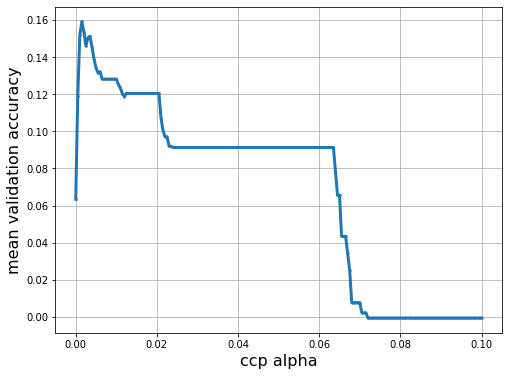

In [9]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [10]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtr_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtr_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0015
Grid best score (accuracy):  0.1591146890575447


Through CART, the best value is 0.0015. I did CART by first converting categorical variables into dummy variables so we can split the data to create cross validated regression trees. This will help us to predict using GridSearchCV. From this, we get the mean test score that is generated and all the ccp_alpha values along with the validation accuracy. Thus, concluding to our result.

iii)

In [11]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [12]:
yelp_test1 = pd.get_dummies(yelp_test)
#yelp_test2 =  pd.get_dummies(yelp_test, drop_first=True)
y_test = yelp_test1['stars']
X_test = yelp_test1.drop(['stars'], axis=1)

# Regression Tree
print('OSR2:', OSR2(dtr_cv_acc, X_test, y_test, y_train))

OSR2: 0.15106004072544033


In [13]:
# MAE Regression Tree
MAE = mean_absolute_error(y_test, dtr_cv_acc.predict(X_test))
MAE

0.6168023463001783

In [14]:
# Linear Regression Tree
def L_OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST
print('Linear OSR2:', L_OSR2(model, yelp_train, yelp_test, 'stars'))

Linear OSR2: 0.1457737680162715


In [15]:
# Linear Reg MAE
linear = LinearRegression().fit(X_train, y_train)
L_MAE = mean_absolute_error(y_test, linear.predict(X_test))
L_MAE

0.6291900079564774

The performance of both models are not great due to the mediocre values we get for OSR^2 and MAE. While the OSR^2 values are low, the MAE values are kind of high. 

# c)

In [16]:
fourOrAbove_train = [1 if i >= 4 else 0 for i in yelp_train['stars']]
fourOrAbove_test = [1 if i >= 4 else 0 for i in yelp_test['stars']]
yelp_train["fourOrAbove"] = fourOrAbove_train
yelp_test["fourOrAbove"] = fourOrAbove_test
yelp_train

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove
0,3.0,53,TRUE,(Missing),TRUE,'free',TRUE,(Missing),(Missing),FALSE,TRUE,(Missing),(Missing),0
1,5.0,6,(Missing),(Missing),TRUE,(Missing),(Missing),FALSE,(Missing),(Missing),(Missing),(Missing),(Missing),1
2,2.5,7,(Missing),(Missing),TRUE,(Missing),FALSE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),0
3,3.5,73,TRUE,'none',TRUE,'no',TRUE,(Missing),TRUE,FALSE,FALSE,(Missing),TRUE,0
4,4.0,203,TRUE,'beer_and_wine',TRUE,'free',TRUE,(Missing),TRUE,TRUE,FALSE,(Missing),TRUE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,3.5,158,TRUE,'none',TRUE,'no',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,TRUE,0
6268,3.5,52,TRUE,'none',TRUE,'no',TRUE,(Missing),(Missing),TRUE,FALSE,(Missing),TRUE,0
6269,2.5,37,TRUE,'none',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,TRUE,FALSE,0
6270,4.0,412,TRUE,'beer_and_wine',TRUE,'free',TRUE,FALSE,(Missing),FALSE,TRUE,FALSE,FALSE,1


In [17]:
yelp_test

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove
0,2.5,15,TRUE,'none',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,(Missing),FALSE,0
1,3.0,54,TRUE,'none',TRUE,'no',FALSE,(Missing),(Missing),FALSE,FALSE,(Missing),TRUE,0
2,3.5,8,(Missing),'none',TRUE,(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),TRUE,0
3,3.0,262,TRUE,'full_bar',TRUE,'free',TRUE,(Missing),(Missing),TRUE,TRUE,(Missing),FALSE,0
4,3.0,5,(Missing),(Missing),TRUE,(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,3.5,40,(Missing),(Missing),TRUE,(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),FALSE,0
2684,3.5,36,FALSE,'full_bar',TRUE,'no',TRUE,(Missing),TRUE,FALSE,TRUE,(Missing),FALSE,0
2685,3.5,285,TRUE,'beer_and_wine',TRUE,'free',TRUE,(Missing),(Missing),TRUE,FALSE,(Missing),FALSE,0
2686,3.5,177,(Missing),(Missing),TRUE,'no',TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,0


# d)

i)

This modeling choice is not reasonable. The false positive and false negative values are calculated seperately when looking at accuracy for performance metrics. 

ii)

In [18]:
y_pred_ols = model.predict(yelp_test.drop(['stars'], axis = 1))
thres = [1 if i >= 4 else 0 for i in y_pred_ols]
thres

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


In [19]:
y_pred_r = dtr_cv_acc.predict(X_test)
thres_r = [1 if i >= 4 else 0 for i in y_pred_r]
thres_r

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


iii)

In [20]:
logreg = smf.logit(formula = "fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + C(Alcohol, Treatment(reference='(Missing)')) + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) + C(WiFi, Treatment(reference='(Missing)')) + C(BikeParking, Treatment(reference='(Missing)')) + C(ByAppointmentOnly, Treatment(reference='(Missing)')) + C(WheelechairAccessible, Treatment(reference='(Missing)')) + C(OutdoorSeating, Treatment(reference='(Missing)')) + C(RestaurantsReservations, Treatment(reference='(Missing)')) + C(DogsAllowed, Treatment(reference='(Missing)')) + C(Caters, Treatment(reference='(Missing)'))", data = yelp_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.603049
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Sun, 17 Oct 2021   Pseudo R-squ.:                  0.1209
Time:                        23:24:44   Log-Likelihood:                -3782.3
converged:                       True   LL-Null:                       -4302.5
Covariance Type:            nonrobust   LLR p-value:                1.634e-203
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------

iv)

In [37]:
yelp_train1 = pd.get_dummies(yelp_train).drop(['stars'], axis=1)
yelp_test1 = pd.get_dummies(yelp_test).drop(['stars'], axis=1)

In [38]:
y_train = yelp_train1['fourOrAbove']
X_train = yelp_train1.drop(['fourOrAbove'], axis=1)

y_test = yelp_test1['fourOrAbove']
X_test = yelp_test1.drop(['fourOrAbove'], axis=1)

X_train.shape, X_test.shape

((6272, 36), (2688, 36))

Node count = 3


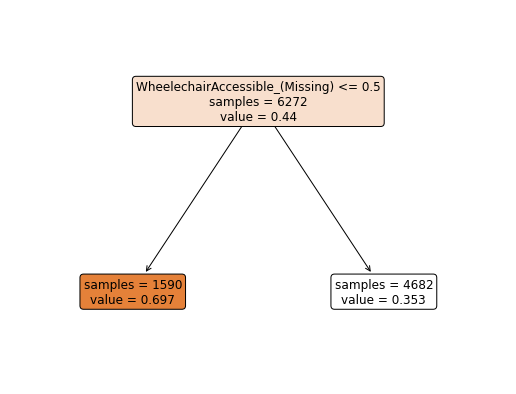

In [39]:
grid_values = {'ccp_alpha': np.linspace(0, 0.001, 6272),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]}
           
dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [40]:
grid_values = {'ccp_alpha':np.linspace(0, 0.1, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'random_state': [88]}

dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv=10, verbose=1)
dtr_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(ccp_alpha=0.02,
                                             min_samples_split=10,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.016...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'min_samples_leaf': [5], 'min_samples_split': 

In [41]:
acc = dtr_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtr_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

,ccp alpha,Validation Accuracy
0,0.0,-0.012351
1,0.0005,0.126794
2,0.001,0.122475
3,0.0015,0.120379
4,0.002,0.113574
5,0.0025,0.111433
6,0.003,0.103473
7,0.0035,0.102429
8,0.004,0.094468
9,0.0045,0.088871


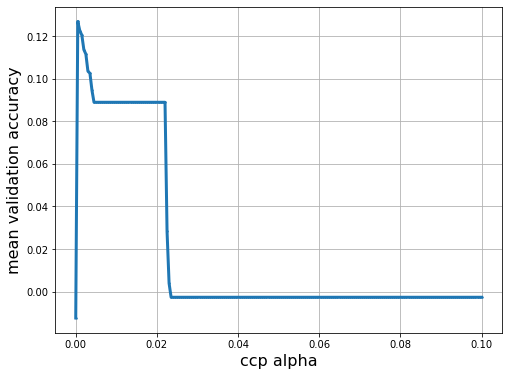

In [42]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [43]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtr_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtr_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0005
Grid best score (accuracy):  0.12679357081687237


I essentially did the same thing as b(ii) but replaced stars with fourOrAbove. Through CART, the best value is 0.0005. I did CART by first converting categorical variables into dummy variables so we can split the data to create cross validated regression trees. This will help us to predict using GridSearchCV. From this, we get the mean test score that is generated and all the ccp_alpha values along with the validation accuracy. Thus, concluding to our result.

In [44]:
# BASELINE

false = np.sum(yelp_test1['fourOrAbove'] == 0)
true = np.sum(yelp_test1['fourOrAbove'] == 1)
print(pd.Series({'0': false, '1': true}))

accuracy_baseline = false / (false + true)
accuracy_baseline

0    1495
1    1193
dtype: int64


0.5561755952380952

In [46]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                              ccp_alpha=0.005,
                              class_weight = {0: 1, 1: 20},
                              random_state = 88)

dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm) 
# print('Precision:',precision_score(y_test, y_pred))
# print('Recall:',recall_score(y_test, y_pred))

# TPR = TP/ (TP + FN)
TPR = 0 / (0 + 1495)
TPR
#FPR = FP/ (FP + TN)
FPR = 0 / (0 + 1193)
FPR

Confusion Matrix : 
 [[   0 1495]
 [   0 1193]]


0.0

The accuracy baseline is relatively high but not high enough. It doesn't perform very well compared to the classification models.

e)

Node count = 27


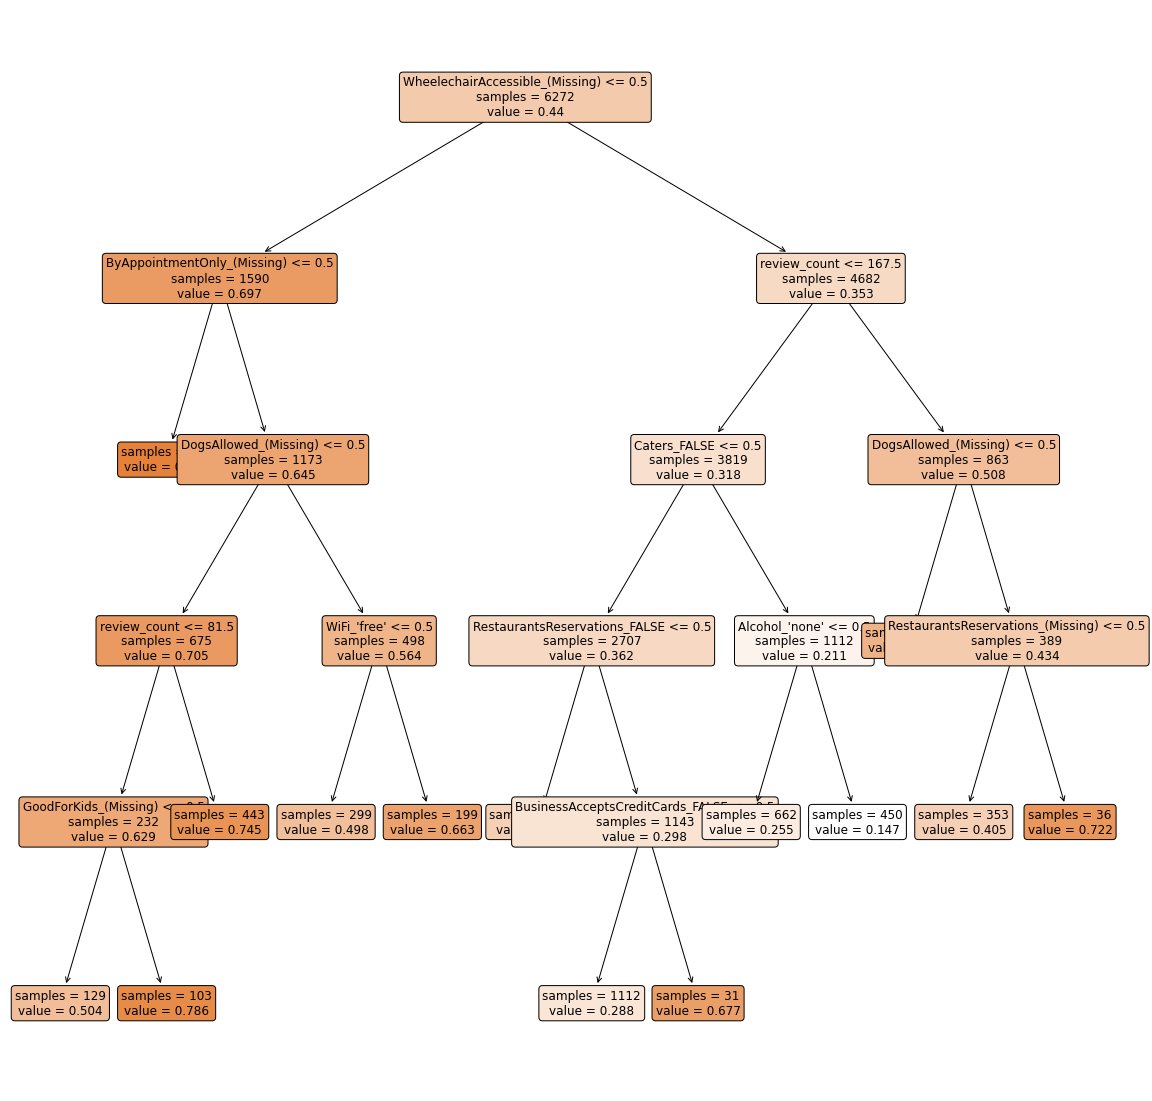

In [48]:
grid_values = {'ccp_alpha': np.linspace(0, 0.001, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}
           
dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.0005,
                            random_state = 88)
dtr = dtr.fit(X_train, y_train)

print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(dtr, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

Based on the graph, people are able to reduce their decisions based on the variables/values in each node. Although it is a bit confusing, they can see if caters, wifi, reservations are avaialble based on "yes" = 1 (right), and "no" = 0 (left) choice. They can use the graph based on what they want. To decode the graph, the value "<= 0.5" is equivalent to 0 will make the user choose the left side, otherwise they would choose the right side. This can also show what creates higher rates. 